In [ ]:

def ica_job():
    import mne
    import numpy as np
    import os 
    import sys
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))# Add the parent directory to the path
    from config import data_dir
    from Preprocessing import preprocess
    from scipy.stats import zscore
    from gICA import gICA
    ids =  [303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]

    icaName= 'gICA_young.fif'
    gica = gICA(ids)
    gica.run(zscore_norm=True, n_components=0.99, max_iter=1000, method='fastica', icaName= icaName)

# submit with submitit one job 
from submitit import AutoExecutor
executor = AutoExecutor(folder="logdir")
executor.update_parameters(cpus_per_task=4,  mem_gb=30,  timeout_min=600)
job = executor.submit(ica_job)




Reading c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\gICA_young.fif ...
Now restoring ICA solution ...
Ready.


C:\Users\gmoha\AppData\Local\Temp\ipykernel_16048\3265458562.py:2: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\gICA_young.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica =mne.preprocessing.read_ica(ica_path)


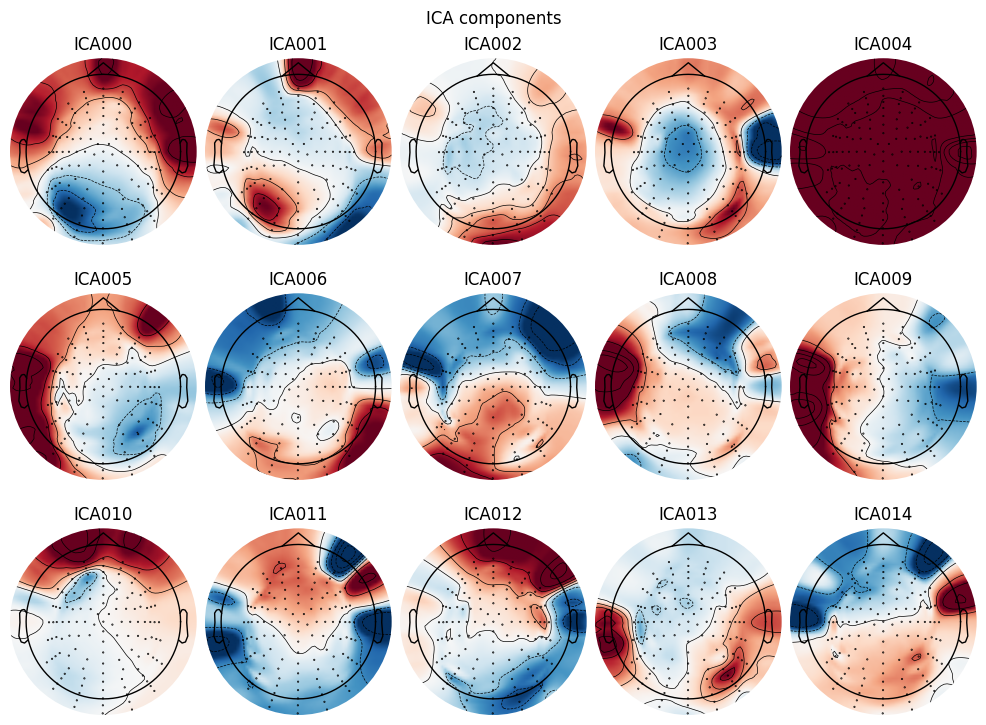

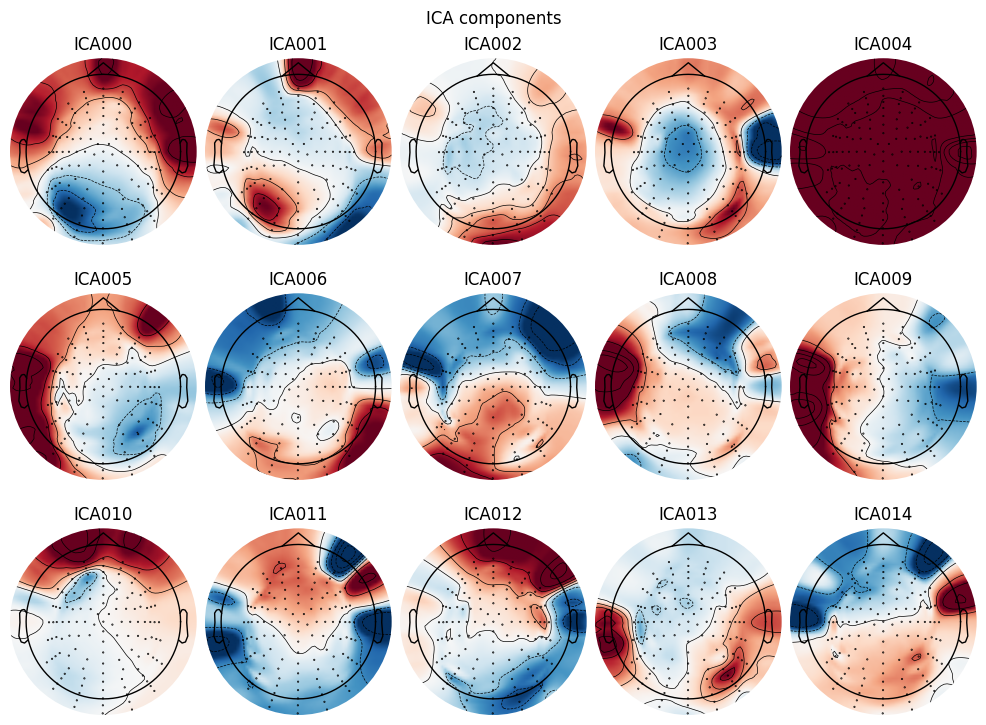

In [ ]:
import mne
import numpy as np
import os 
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))# Add the parent directory to the path
from config import data_dir

icaName= 'gICA_young.fif'
ica_path = os.path.join(data_dir, icaName)
ica =mne.preprocessing.read_ica(ica_path)
ica.plot_components(picks = np.arange(15))  # Plot the ICA components
